# Task 4: Email Spam Detection using Python and ML

Importing required libraries

In [1]:
# Necessary Libraries
import pandas as pd
import numpy as np
import nltk
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

f:\Softwares\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading the data

In [3]:
df1 = pd.read_csv(r"spam.csv", encoding='latin=1')
df1.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

Data preprocessing

In [4]:
df2 = pd.read_csv(r"spam.csv", encoding='latin=1')
df2 = df2.drop(df2.columns[[ 2, 3, 4]], axis=1)
df2.head

<bound method NDFrame.head of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

Data Preprocessing

In [5]:
# Load the CSV file
df = pd.read_csv(r"spam.csv", encoding='latin=1')
df = df.drop(df.columns[[ 2, 3, 4]], axis=1)
# Text preprocessing
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
for i in range(len(df)):
    df.at[i, 'v2'] = df.at[i, 'v2'].lower().replace('[^\w\s]','')
    df.at[i, 'v2'] = word_tokenize(df.at[i, 'v2'])
    df.at[i, 'v2'] = [word for word in df.at[i, 'v2'] if word not in stop_words]
    df.at[i, 'v2'] = [stemmer.stem(word) for word in df.at[i, 'v2']]
    df.at[i, 'v2'] = [lemmatizer.lemmatize(word) for word in df.at[i, 'v2']]

Applying Word2Vec

In [6]:
# Word2Vec
sentences = df['v2'].tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [7]:
# Create feature vectors
X = np.zeros((len(sentences), 100))
for i, sentence in enumerate(sentences):
    for word in sentence:
        X[i, :] += model.wv[word]

In [8]:
# Create target variable
y = np.where(df['v1']=='spam', 1, 0)

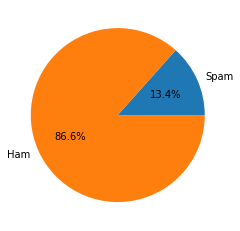

In [9]:
# Show pie chart of target variable
spam_count = np.sum(y)
ham_count = len(y) - spam_count
plt.pie([spam_count, ham_count], labels=['Spam', 'Ham'], autopct='%1.1f%%')
plt.show()

Splitting the data

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [11]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
# Make predictions on testing set
y_pred = lr.predict(X_test)

f:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating the model

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 96.59%


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

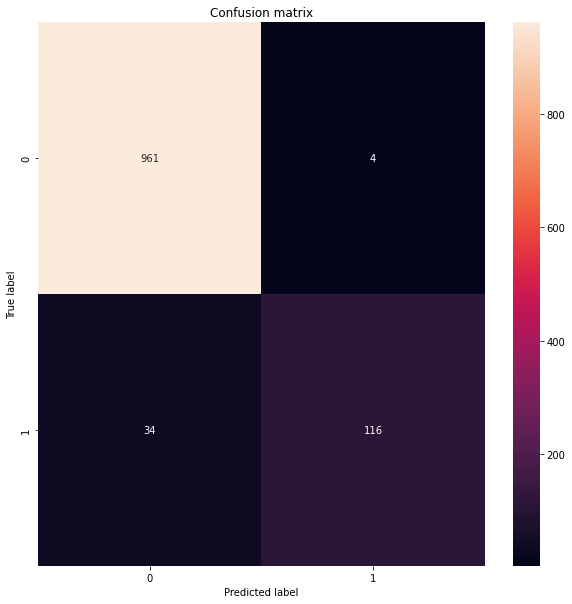

In [15]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()